In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats as stats

In [2]:
def t1t2(sigma1, sigma2, t):
    numerator = np.exp(t**2/(2*sigma1**2-2*sigma2**2))*np.sqrt(1/sigma1**2)*sigma1
    denominator = np.sqrt(1/sigma2**2)*sigma2*np.sqrt(-sigma1**2+sigma2**2)
    result = numerator / denominator
    return result

n_comp: 32
n_theo: 128


<IPython.core.display.Javascript object>


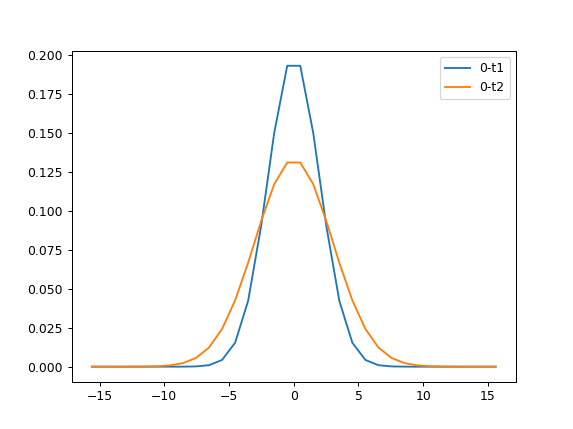

In [115]:
eps = 10**-7
n_comp = 2**5
n_theo = 2**7
sigma1 = 2
sigma2 = 3
k_comp = np.linspace(stats.norm.ppf(eps,scale=sigma2), stats.norm.ppf(1-eps,scale=sigma2), n_comp)
k_theo = np.linspace(stats.norm.ppf(eps,scale=sigma2), stats.norm.ppf(1-eps,scale=sigma2), n_theo)
pdf_0_t1 = stats.norm.pdf(k_comp, scale=sigma1)
pdf_0_t2 = stats.norm.pdf(k_comp, scale=sigma2)

print('n_comp: '+str(n_comp))
print('n_theo: '+str(n_theo))
plt.figure()
plt.plot(k_comp, pdf_0_t1, label='0-t1')
plt.plot(k_comp, pdf_0_t2, label='0-t2')
plt.legend()

<IPython.core.display.Javascript object>


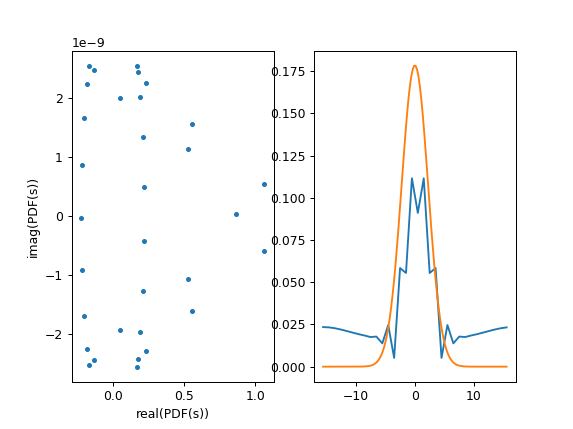

In [116]:
PDF_0_t1 = np.fft.fft(pdf_0_t1, norm='ortho')
PDF_0_t2 = np.fft.fft(pdf_0_t2, norm='ortho')
PDF_t1_t2 = PDF_0_t2 / PDF_0_t1 
pdf_t1_t2 = np.fft.ifft(PDF_t1_t2, norm='ortho')

plt.figure()
plt.subplot(121)
plt.plot(pdf_t1_t2.real, pdf_t1_t2.imag, ls='', marker='.')
plt.xlabel('real(PDF(s))')
plt.ylabel('imag(PDF(s))')
plt.subplot(122)
shifter = int(len(pdf_t1_t2)/2)
pdf_t1_t2_roll = np.roll(pdf_t1_t2, shifter)

scaler_t1t2_comp = np.trapz(np.abs(pdf_t1_t2_roll), k_comp)
scaler_t1t2_theo = np.trapz(t1t2(sigma1,sigma2,k_theo), k_theo)
plt.plot(k_comp,np.abs(pdf_t1_t2_roll)/scaler_t1t2_comp,label='computed')
plt.plot(k_theo,t1t2(sigma1,sigma2,k_theo)/scaler_t1t2_theo,label='theoretical')


<IPython.core.display.Javascript object>


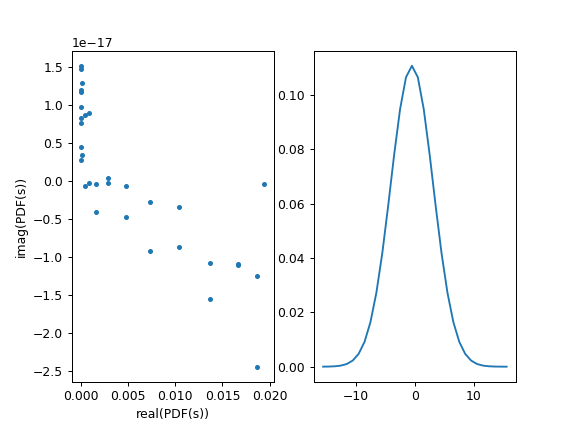

In [117]:
PDF_0_t3 = PDF_0_t1 * PDF_0_t2
pdf_0_t3 = np.fft.ifft(PDF_0_t3,norm='ortho')
plt.figure()
plt.subplot(121)
plt.plot(pdf_0_t3.real, pdf_0_t3.imag, ls='', marker='.')
plt.xlabel('real(PDF(s))')
plt.ylabel('imag(PDF(s))')
plt.subplot(122)
shifter = int(len(pdf_0_t3)/2)
pdf_0_t3_roll = np.roll(pdf_0_t3, shifter)
scaler3 = np.trapz(np.abs(pdf_0_t3_roll), k_comp)
pdf_0_t3 = np.abs(pdf_0_t3_roll)/scaler3
plt.plot(k_comp,pdf_0_t3,label='0-t3')

<IPython.core.display.Javascript object>


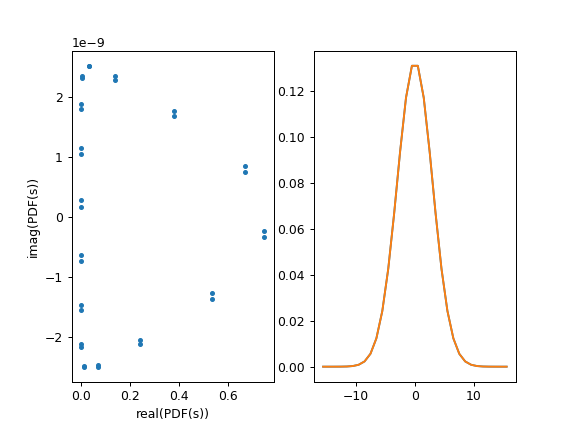

In [118]:
PDF_0_t1 = np.fft.fft(pdf_0_t1, norm='ortho')
PDF_0_t3 = np.fft.fft(pdf_0_t3, norm='ortho')
PDF_t1_t3 = PDF_0_t3 / PDF_0_t1
pdf_t1_t3 = np.fft.ifft(PDF_t1_t3, norm='ortho')

plt.figure()
plt.subplot(121)
plt.plot(pdf_t1_t3.real, pdf_t1_t3.imag, ls='', marker='.')
plt.xlabel('real(PDF(s))')
plt.ylabel('imag(PDF(s))')
plt.subplot(122)
shifter = int(len(pdf_t1_t3)/2)
pdf_t1_t3_roll = np.roll(pdf_t1_t3, shifter)

scaler_t1t3_comp = np.trapz(np.abs(pdf_t1_t3_roll), k_comp)
plt.plot(k_comp,np.abs(pdf_t1_t3_roll)/scaler_t1t3_comp,label='computed')
plt.plot(k_comp,pdf_0_t2,label='theoretical')

In [119]:
np.std(pdf_t1_t3)

0.2517499998999316